# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
n_agents = len(env_info.agents)
print('Number of agents:', n_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

Episode 0	Score: -0.00500	Average Score: -0.00500
Episode 0	Average Score: -0.00500
Episode 1	Score: -0.00500	Average Score: -0.00500
Episode 2	Score: -0.00500	Average Score: -0.00500
Episode 3	Score: 0.04500	Average Score: 0.00750
Episode 4	Score: -0.00500	Average Score: 0.00500
Episode 5	Score: -0.00500	Average Score: 0.00333
Episode 6	Score: 0.04500	Average Score: 0.00929
Episode 7	Score: -0.00500	Average Score: 0.00750
Episode 8	Score: -0.00500	Average Score: 0.00611
Episode 9	Score: -0.00500	Average Score: 0.00500
Episode 10	Score: 0.04500	Average Score: 0.00864
Episode 11	Score: 0.04500	Average Score: 0.01167
Episode 12	Score: -0.00500	Average Score: 0.01038
Episode 13	Score: 0.04500	Average Score: 0.01286
Episode 14	Score: -0.00500	Average Score: 0.01167
Episode 15	Score: -0.00500	Average Score: 0.01063
Episode 16	Score: -0.00500	Average Score: 0.00971
Episode 17	Score: -0.00500	Average Score: 0.00889
Episode 18	Score: -0.00500	Average Score: 0.00816
Episode 19	Score: -0.00500	A

Episode 162	Score: -0.00500	Average Score: 0.00100
Episode 163	Score: -0.00500	Average Score: 0.00100
Episode 164	Score: -0.00500	Average Score: 0.00100
Episode 165	Score: -0.00500	Average Score: 0.00100
Episode 166	Score: -0.00500	Average Score: 0.00050
Episode 167	Score: -0.00500	Average Score: 0.00050
Episode 168	Score: -0.00500	Average Score: 0.00050
Episode 169	Score: -0.00500	Average Score: 0.00050
Episode 170	Score: -0.00500	Average Score: 0.00050
Episode 171	Score: -0.00500	Average Score: 0.00050
Episode 172	Score: -0.00500	Average Score: 0.00050
Episode 173	Score: -0.00500	Average Score: 0.00050
Episode 174	Score: -0.00500	Average Score: 0.00050
Episode 175	Score: -0.00500	Average Score: 0.00050
Episode 176	Score: -0.00500	Average Score: -0.00050
Episode 177	Score: -0.00500	Average Score: -0.00050
Episode 178	Score: -0.00500	Average Score: -0.00100
Episode 179	Score: -0.00500	Average Score: -0.00100
Episode 180	Score: -0.00500	Average Score: -0.00150
Episode 181	Score: -0.0050

Episode 319	Score: -0.00500	Average Score: -0.00100
Episode 320	Score: -0.00500	Average Score: -0.00200
Episode 321	Score: -0.00500	Average Score: -0.00200
Episode 322	Score: -0.00500	Average Score: -0.00200
Episode 323	Score: -0.00500	Average Score: -0.00200
Episode 324	Score: -0.00500	Average Score: -0.00200
Episode 325	Score: -0.00500	Average Score: -0.00200
Episode 326	Score: -0.00500	Average Score: -0.00200
Episode 327	Score: -0.00500	Average Score: -0.00200
Episode 328	Score: -0.00500	Average Score: -0.00300
Episode 329	Score: -0.00500	Average Score: -0.00300
Episode 330	Score: -0.00500	Average Score: -0.00300
Episode 331	Score: -0.00500	Average Score: -0.00300
Episode 332	Score: -0.00500	Average Score: -0.00300
Episode 333	Score: -0.00500	Average Score: -0.00300
Episode 334	Score: -0.00500	Average Score: -0.00300
Episode 335	Score: -0.00500	Average Score: -0.00300
Episode 336	Score: -0.00500	Average Score: -0.00300
Episode 337	Score: -0.00500	Average Score: -0.00300
Episode 338	

Episode 476	Score: -0.00500	Average Score: -0.00500
Episode 477	Score: -0.00500	Average Score: -0.00500
Episode 478	Score: -0.00500	Average Score: -0.00500
Episode 479	Score: -0.00500	Average Score: -0.00500
Episode 480	Score: -0.00500	Average Score: -0.00500
Episode 481	Score: -0.00500	Average Score: -0.00500
Episode 482	Score: -0.00500	Average Score: -0.00500
Episode 483	Score: -0.00500	Average Score: -0.00500
Episode 484	Score: -0.00500	Average Score: -0.00500
Episode 485	Score: -0.00500	Average Score: -0.00500
Episode 486	Score: -0.00500	Average Score: -0.00500
Episode 487	Score: -0.00500	Average Score: -0.00500
Episode 488	Score: -0.00500	Average Score: -0.00500
Episode 489	Score: -0.00500	Average Score: -0.00500
Episode 490	Score: -0.00500	Average Score: -0.00500
Episode 491	Score: -0.00500	Average Score: -0.00500
Episode 492	Score: -0.00500	Average Score: -0.00500
Episode 493	Score: -0.00500	Average Score: -0.00500
Episode 494	Score: -0.00500	Average Score: -0.00500
Episode 495	

Episode 633	Score: 0.04500	Average Score: -0.00100
Episode 634	Score: -0.00500	Average Score: -0.00100
Episode 635	Score: -0.00500	Average Score: -0.00100
Episode 636	Score: 0.04500	Average Score: -0.00050
Episode 637	Score: -0.00500	Average Score: -0.00050
Episode 638	Score: -0.00500	Average Score: -0.00050
Episode 639	Score: -0.00500	Average Score: -0.00050
Episode 640	Score: -0.00500	Average Score: -0.00050
Episode 641	Score: -0.00500	Average Score: -0.00050
Episode 642	Score: -0.00500	Average Score: -0.00050
Episode 643	Score: -0.00500	Average Score: -0.00050
Episode 644	Score: -0.00500	Average Score: -0.00050
Episode 645	Score: -0.00500	Average Score: -0.00050
Episode 646	Score: -0.00500	Average Score: -0.00050
Episode 647	Score: -0.00500	Average Score: -0.00050
Episode 648	Score: -0.00500	Average Score: -0.00050
Episode 649	Score: -0.00500	Average Score: -0.00050
Episode 650	Score: 0.04500	Average Score: 0.00000
Episode 651	Score: 0.04500	Average Score: 0.00050
Episode 652	Score:

Episode 795	Score: 0.14500	Average Score: 0.03700
Episode 796	Score: 0.04500	Average Score: 0.03750
Episode 797	Score: 0.09500	Average Score: 0.03850
Episode 798	Score: -0.00500	Average Score: 0.03850
Episode 799	Score: -0.00500	Average Score: 0.03850
Episode 800	Score: 0.14000	Average Score: 0.03995
Episode 800	Average Score: 0.03995
Episode 801	Score: 0.04500	Average Score: 0.04045
Episode 802	Score: -0.00500	Average Score: 0.03995
Episode 803	Score: 0.04500	Average Score: 0.03895
Episode 804	Score: 0.14500	Average Score: 0.04045
Episode 805	Score: 0.04500	Average Score: 0.04045
Episode 806	Score: 0.04500	Average Score: 0.04095
Episode 807	Score: -0.00500	Average Score: 0.04045
Episode 808	Score: -0.00500	Average Score: 0.04045
Episode 809	Score: -0.00500	Average Score: 0.03995
Episode 810	Score: -0.00500	Average Score: 0.03995
Episode 811	Score: 0.04500	Average Score: 0.03995
Episode 812	Score: 0.04500	Average Score: 0.03945
Episode 813	Score: -0.00500	Average Score: 0.03895
Episode

Episode 957	Score: 0.04500	Average Score: 0.08650
Episode 958	Score: 0.04500	Average Score: 0.08700
Episode 959	Score: 0.14500	Average Score: 0.08750
Episode 960	Score: 0.04500	Average Score: 0.08800
Episode 961	Score: 0.04500	Average Score: 0.08850
Episode 962	Score: 0.04500	Average Score: 0.08850
Episode 963	Score: 0.04500	Average Score: 0.08850
Episode 964	Score: 0.04500	Average Score: 0.08900
Episode 965	Score: 0.09500	Average Score: 0.09000
Episode 966	Score: 0.04500	Average Score: 0.08950
Episode 967	Score: 0.04500	Average Score: 0.09000
Episode 968	Score: 0.04500	Average Score: 0.09050
Episode 969	Score: 0.04500	Average Score: 0.09050
Episode 970	Score: 0.04500	Average Score: 0.09100
Episode 971	Score: 0.04500	Average Score: 0.09100
Episode 972	Score: 0.04500	Average Score: 0.09100
Episode 973	Score: 0.04500	Average Score: 0.09100
Episode 974	Score: 0.04500	Average Score: 0.09150
Episode 975	Score: 0.04500	Average Score: 0.09200
Episode 976	Score: -0.00500	Average Score: 0.09150

Episode 1118	Score: 0.14500	Average Score: 0.06300
Episode 1119	Score: 0.04500	Average Score: 0.06250
Episode 1120	Score: 0.04500	Average Score: 0.06150
Episode 1121	Score: 0.04500	Average Score: 0.06150
Episode 1122	Score: 0.04500	Average Score: 0.06150
Episode 1123	Score: 0.04500	Average Score: 0.06150
Episode 1124	Score: 0.04500	Average Score: 0.06050
Episode 1125	Score: 0.04500	Average Score: 0.06050
Episode 1126	Score: 0.04500	Average Score: 0.06050
Episode 1127	Score: 0.04500	Average Score: 0.06050
Episode 1128	Score: 0.04500	Average Score: 0.06050
Episode 1129	Score: 0.24500	Average Score: 0.06250
Episode 1130	Score: 0.09500	Average Score: 0.06300
Episode 1131	Score: 0.14500	Average Score: 0.06400
Episode 1132	Score: 0.14500	Average Score: 0.06450
Episode 1133	Score: 0.34500	Average Score: 0.06750
Episode 1134	Score: 0.39500	Average Score: 0.07100
Episode 1135	Score: 0.54500	Average Score: 0.07600
Episode 1136	Score: 0.04500	Average Score: 0.07600
Episode 1137	Score: 0.14500	Ave

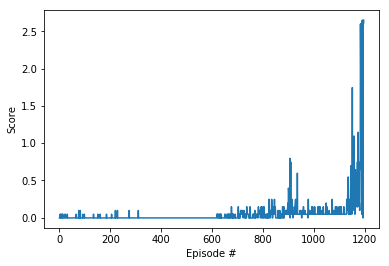

In [7]:

from DDPG_Agent import Agent

agent = Agent(state_size=24, action_size=2, n_agents=2, seed=0, activation="tanh")

brain_name = env.brain_names[0]
n_episodes=20000
max_t=10000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = []
scores_window = deque(maxlen=100)

eps = eps_start

for i_episode in range(n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
    states = env_info.vector_observations
    score = np.zeros(n_agents)

    while True:
        actions = agent.act(states, eps)
        actions = actions.reshape(n_agents, action_size)
        env_info = env.step( actions )[brain_name]               # send the action to the environment                            
        next_states = env_info.vector_observations               # get the next state        
        rewards = env_info.rewards                               # get the reward
        dones = env_info.local_done                              # see if episode has finished        
        agent.step(states, actions, rewards, next_states, dones)

        score += rewards                                         # update the score

        states = next_states                                     # roll over the state to next time step        

        if np.any( dones ):                                          # exit loop if episode finished        
            break                                        


    scores.append(np.mean(score))
    scores_window.append(np.mean(score))
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tScore: {:.5f}\tAverage Score: {:.5f}'.format(i_episode, score.mean(), np.mean(scores_window)))
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=0.5:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.5f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.policy_local.state_dict(), 'policy.pth')
        break


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


When finished, you can close the environment.